

## ANALIZA TECHNICZNA USD/PLN Styczeń - Marzec 2025 (3 miesiące danych dziennych)



In [185]:
# IMPORT BIBLIOTEK


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Ustawienia dla matplotlib
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

## ETAP 1: Wczytanie i przygotowanie danych


In [186]:
# Wczytujemy dane z pliku CSV
df = pd.read_csv('usdpln_d.csv')

# Konwertujemy Date na datetime
df['Date'] = pd.to_datetime(df['Date'])

# Usuwamy brakujące wartości
initial_rows = len(df)
df = df.dropna()
removed_rows = initial_rows - len(df)

# Sortujemy po dacie
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Dodajemy Volume bo brakuje
if 'Volume' not in df.columns:
    df['Volume'] = 0

print('WCZYTYWANIE DANYCH')
if removed_rows > 0:
    print(f'⚠ Usunięto wierszy: {removed_rows}')

print(f'\nOkres analizy:')
print(f'  Od: {df.index[0].date()}')
print(f'  Do: {df.index[-1].date()}')
print(f'  Liczba dni: {len(df)}')

print(f'\nStatystyki ceny (Close):')
print(f'  Min:  {df["Close"].min():.4f} PLN')
print(f'  Max:  {df["Close"].max():.4f} PLN')
print(f'  Mean: {df["Close"].mean():.4f} PLN')
print(f'  Std:  {df["Close"].std():.4f} PLN')

zmiana = ((df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0]) * 100
print(f'  Zmiana: {zmiana:+.2f}%')

print('\nPierwsze 5 wierszy:')
print(df.head())


WCZYTYWANIE DANYCH

Okres analizy:
  Od: 2025-01-02
  Do: 2025-03-31
  Liczba dni: 63

Statystyki ceny (Close):
  Min:  3.8218 PLN
  Max:  4.1638 PLN
  Mean: 3.9911 PLN
  Std:  0.1060 PLN
  Zmiana: -7.07%

Pierwsze 5 wierszy:
               Open     High      Low    Close  Volume
Date                                                  
2025-01-02  4.13170  4.18084  4.11415  4.16199       0
2025-01-03  4.16287  4.16440  4.14055  4.14160       0
2025-01-06  4.14605  4.15105  4.07145  4.09350       0
2025-01-07  4.09320  4.12240  4.07355  4.11855       0
2025-01-08  4.11855  4.16060  4.11635  4.14290       0


## ETAP 2: Wskaźniki techniczne


In [187]:
# SMA (Simple Moving Average): średnia prosta wszystkich cen
# EMA (Exponential Moving Average): średnia ważona, szybciej reaguje

# Oblicz SMA
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Oblicz EMA
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

print(f'\nAktualne wartości (ostatni dzień):')
print(f'  Close:    {df["Close"].iloc[-1]:.4f} PLN')
print(f'  SMA_20:   {df["SMA_20"].iloc[-1]:.4f} PLN')
print(f'  SMA_50:   {df["SMA_50"].iloc[-1]:.4f} PLN')
print(f'  EMA_12:   {df["EMA_12"].iloc[-1]:.4f} PLN')
print(f'  EMA_26:   {df["EMA_26"].iloc[-1]:.4f} PLN')

if df['EMA_12'].iloc[-1] > df['EMA_26'].iloc[-1]:
    print(f'  Trend WZROSTOWY (EMA_12 > EMA_26)')
else:
    print(f'  Trend SPADKOWY (EMA_12 < EMA_26)')



Aktualne wartości (ostatni dzień):
  Close:    3.8678 PLN
  SMA_20:   3.8611 PLN
  SMA_50:   3.9535 PLN
  EMA_12:   3.8688 PLN
  EMA_26:   3.8942 PLN
  Trend SPADKOWY (EMA_12 < EMA_26)


In [188]:
# RSI mierzy siłę zmian ceny. Zakres: 0-100
# >70: OVERBOUGHT  - sygnał sprzedaży
# <30: OVERSOLD  - sygnał kupna
# 30-70: Strefa neutralna

def calculate_rsi(prices, period=14):
    """Oblicz RSI dla serii cen"""
    delta = prices.diff()
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)
    avg_gain = gains.rolling(window=period).mean()
    avg_loss = losses.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Close'], period=14)

print('RSI (Relative Strength Index)')
print('\nInterpretacja:')
print('  RSI > 70: OVERBOUGHT  → Sygnał SPRZEDAŻY')
print('  RSI < 30: OVERSOLD  → Sygnał KUPNA')
print('  30-70:    Strefa neutralna')

last_rsi = df['RSI'].iloc[-1]
print(f'\nAktualna wartość RSI: {last_rsi:.2f}')

if last_rsi > 70:
    print(f'   OVERBOUGHT - Sygnał sprzedaży')
elif last_rsi < 30:
    print(f'   OVERSOLD - Sygnał kupna')
else:
    print(f'   Neutralna strefa (30-70)')

overbought = (df['RSI'] > 70).sum()
oversold = (df['RSI'] < 30).sum()
neutral = ((df['RSI'] >= 30) & (df['RSI'] <= 70)).sum()

print(f'\nDni w poszczególnych strefach:')
print(f'  OVERBOUGHT (>70): {overbought} dni')
print(f'  OVERSOLD (<30):   {oversold} dni')
print(f'  NEUTRAL (30-70):  {neutral} dni')


RSI (Relative Strength Index)

Interpretacja:
  RSI > 70: OVERBOUGHT  → Sygnał SPRZEDAŻY
  RSI < 30: OVERSOLD  → Sygnał KUPNA
  30-70:    Strefa neutralna

Aktualna wartość RSI: 54.91
   Neutralna strefa (30-70)

Dni w poszczególnych strefach:
  OVERBOUGHT (>70): 0 dni
  OVERSOLD (<30):   9 dni
  NEUTRAL (30-70):  41 dni


In [189]:
# MACD pokazuje relacje między dwiema średnimi ruchomymi
# Sygnały: MACD > Signal = kupuj, MACD < Signal = sprzedaj

def calculate_macd(prices, fast=12, slow=26, signal=9):
    """Oblicz MACD"""
    ema_fast = prices.ewm(span=fast, adjust=False).mean()
    ema_slow = prices.ewm(span=slow, adjust=False).mean()
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal, adjust=False).mean()
    histogram = macd_line - signal_line
    return macd_line, signal_line, histogram

df['MACD_Line'], df['MACD_Signal'], df['MACD_Histogram'] = calculate_macd(df['Close'])

print('MACD (Moving Average Convergence Divergence)')

print('\nInterpretacja:')
print('  MACD > Signal: Trend WZROSTOWY → Sygnał KUPNA')
print('  MACD < Signal: Trend SPADKOWY → Sygnał SPRZEDAŻY')

last_macd = df['MACD_Line'].iloc[-1]
last_signal = df['MACD_Signal'].iloc[-1]

print(f'\nAktualne wartości (ostatni dzień):')
print(f'  MACD Line:   {last_macd:.6f}')
print(f'  MACD Signal: {last_signal:.6f}')
print(f'  MACD Histogram: {(last_macd - last_signal):.6f}')

if last_macd > last_signal:
    print(f'  Status:  MACD > Signal → Trend WZROSTOWY')
else:
    print(f'  Status:  MACD < Signal → Trend SPADKOWY')


MACD (Moving Average Convergence Divergence)

Interpretacja:
  MACD > Signal: Trend WZROSTOWY → Sygnał KUPNA
  MACD < Signal: Trend SPADKOWY → Sygnał SPRZEDAŻY

Aktualne wartości (ostatni dzień):
  MACD Line:   -0.025403
  MACD Signal: -0.033944
  MACD Histogram: 0.008542
  Status:  MACD > Signal → Trend WZROSTOWY


In [190]:
# Bollinger Bands pokazują zmienność ceny


def calculate_bollinger_bands(prices, period=20, std_dev=2):
    middle = prices.rolling(window=period).mean()
    std = prices.rolling(window=period).std()
    upper = middle + (std * std_dev)
    lower = middle - (std * std_dev)
    return upper, middle, lower

df['BB_Upper'], df['BB_Middle'], df['BB_Lower'] = calculate_bollinger_bands(df['Close'])

print('BOLLINGER BANDS')

print('\nInterpretacja:')
print('  Cena na Upper Band:  Możliwe OVERBOUGHT → Sprzedaż')
print('  Cena na Lower Band:  Możliwe OVERSOLD → Kupno')

print(f'\nAktualne wartości (ostatni dzień):')
print(f'  Upper Band:  {df["BB_Upper"].iloc[-1]:.4f} PLN')
print(f'  Middle Band: {df["BB_Middle"].iloc[-1]:.4f} PLN')
print(f'  Lower Band:  {df["BB_Lower"].iloc[-1]:.4f} PLN')
print(f'  Close Price: {df["Close"].iloc[-1]:.4f} PLN')

if df['Close'].iloc[-1] > df['BB_Upper'].iloc[-1] * 0.98:
    print(f'  Status:  Cena blisko Upper Band - możliwe przegrzanie')
elif df['Close'].iloc[-1] < df['BB_Lower'].iloc[-1] * 1.02:
    print(f'  Status:  Cena blisko Lower Band - możliwe przeziębianie')
else:
    print(f'  Status:  Cena w normalnym zakresie pasm')


BOLLINGER BANDS

Interpretacja:
  Cena na Upper Band:  Możliwe OVERBOUGHT → Sprzedaż
  Cena na Lower Band:  Możliwe OVERSOLD → Kupno

Aktualne wartości (ostatni dzień):
  Upper Band:  3.9068 PLN
  Middle Band: 3.8611 PLN
  Lower Band:  3.8153 PLN
  Close Price: 3.8678 PLN
  Status:  Cena blisko Upper Band - możliwe przegrzanie


In [191]:

def calculate_atr(df, period=14):
    high_low = df['High'] - df['Low']
    high_close = abs(df['High'] - df['Close'].shift())
    low_close = abs(df['Low'] - df['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)
    atr = true_range.rolling(period).mean()
    return atr

df['ATR'] = calculate_atr(df)

print('ATR (Average True Range)')

print('\nInterpretacja:')
print('  ATR pokazuje średnią zmienność ceny')
print('  Wyższy ATR: Większa zmienność (większy risk/reward)')
print('  Niższy ATR:  Mniejsza zmienność (stabilniejszy rynek)')

print('\nZastosowanie:')
print('  Stop-Loss = Aktualna cena - (2 * ATR)')
print('  Take-Profit = Aktualna cena + (3 * ATR)')

print(f'\nAktualne wartości ATR:')
print(f'  Średnia ATR: {df["ATR"].mean():.4f}')
print(f'  Min ATR:     {df["ATR"].min():.4f}')
print(f'  Max ATR:     {df["ATR"].max():.4f}')
print(f'  Ostatnia:    {df["ATR"].iloc[-1]:.4f}')


ATR (Average True Range)

Interpretacja:
  ATR pokazuje średnią zmienność ceny
  Wyższy ATR: Większa zmienność (większy risk/reward)
  Niższy ATR:  Mniejsza zmienność (stabilniejszy rynek)

Zastosowanie:
  Stop-Loss = Aktualna cena - (2 * ATR)
  Take-Profit = Aktualna cena + (3 * ATR)

Aktualne wartości ATR:
  Średnia ATR: 0.0435
  Min ATR:     0.0343
  Max ATR:     0.0521
  Ostatnia:    0.0343


## ETAP 3: Detectowanie formacji świecowych


In [192]:

# DOJI - Formacja niezdecydowania (otwarcie ≈ zamknięcie)
doji_threshold = 0.001
df['Doji'] = abs(df['Close'] - df['Open']) / (df['High'] - df['Low'] + 1e-6) < doji_threshold

# ENGULFING - Zaglądanie (zmiana trendu)
df['Engulfing_Bullish'] = (
    (df['Close'].shift(1) < df['Open'].shift(1)) &
    (df['Close'] > df['Open'].shift(1)) &
    (df['Open'] < df['Close'].shift(1))
)

df['Engulfing_Bearish'] = (
    (df['Close'].shift(1) > df['Open'].shift(1)) &
    (df['Close'] < df['Open'].shift(1)) &
    (df['Open'] > df['Close'].shift(1))
)

# HAMMER - Młotek (dno, sygnał kupna)
body = abs(df['Close'] - df['Open'])
lower_wick = df['Open'].where(df['Close'] < df['Open'], df['Close']) - df['Low']
upper_wick = df['High'] - df['Close'].where(df['Close'] > df['Open'], df['Open'])
df['Hammer'] = (lower_wick > 2 * body) & (upper_wick < 0.5 * body) & (body > 0)

# SHOOTING STAR - Spadająca gwiazda (szczyt, sygnał sprzedaży)
df['Shooting_Star'] = (upper_wick > 2 * body) & (lower_wick < 0.5 * body) & (body > 0)

print('FORMACJE ŚWIECOWE')

doji_count = df['Doji'].sum()
engulfing_bullish_count = df['Engulfing_Bullish'].sum()
engulfing_bearish_count = df['Engulfing_Bearish'].sum()
hammer_count = df['Hammer'].sum()
shooting_star_count = df['Shooting_Star'].sum()

print(f' Doji: {doji_count}')
print(f'  Interpretacja: Niezdecydowanie rynku, możliwy punkt zwrotny')

print(f'\n Engulfing Bullish: {engulfing_bullish_count}')
print(f'  Interpretacja: Zmiana z trendu spadkowego na wzrostowy')

print(f'\n Engulfing Bearish: {engulfing_bearish_count}')
print(f'  Interpretacja: Zmiana z trendu wzrostowego na spadkowy')

print(f'\n Hammer: {hammer_count}')
print(f'  Interpretacja: Formacja dna, sygnał kupna')

print(f'\n Shooting Star: {shooting_star_count}')
print(f'  Interpretacja: Formacja szczytu, sygnał sprzedaży')

total_patterns = doji_count + engulfing_bullish_count + engulfing_bearish_count + hammer_count + shooting_star_count
print(f'\nRazem detectowanych formacji: {total_patterns}')


FORMACJE ŚWIECOWE
 Doji: 0
  Interpretacja: Niezdecydowanie rynku, możliwy punkt zwrotny

 Engulfing Bullish: 3
  Interpretacja: Zmiana z trendu spadkowego na wzrostowy

 Engulfing Bearish: 1
  Interpretacja: Zmiana z trendu wzrostowego na spadkowy

 Hammer: 3
  Interpretacja: Formacja dna, sygnał kupna

 Shooting Star: 0
  Interpretacja: Formacja szczytu, sygnał sprzedaży

Razem detectowanych formacji: 7


## ETAP 4: Generowanie sygnałów handlowych


In [193]:
df['Signal'] = 0  # 0: brak, 1: kupno, -1: sprzedaż
df['Signal_Strength'] = 0

# SYGNAŁY KUPNA
buy_strength = pd.Series(0, index=df.index)

buy_strength[(df['RSI'] < 30)] += 1  # RSI oversold
buy_strength[(df['MACD_Line'] > df['MACD_Signal']) & 
            (df['MACD_Line'].shift(1) <= df['MACD_Signal'].shift(1))] += 1  # MACD cross up
buy_strength[(df['Close'] <= df['BB_Lower'] * 1.02)] += 1  # Price on BB Lower
buy_strength[df['Hammer']] += 2  # Hammer (waga 2)
buy_strength[df['Engulfing_Bullish']] += 2  # Engulfing Bullish (waga 2)
buy_strength[(df['EMA_12'] > df['EMA_26'])] += 1  # EMA trend up

buy_signals = buy_strength >= 2

# SYGNAŁY SPRZEDAŻY
sell_strength = pd.Series(0, index=df.index)

sell_strength[(df['RSI'] > 70)] += 1  # RSI overbought
sell_strength[(df['MACD_Line'] < df['MACD_Signal']) & 
             (df['MACD_Line'].shift(1) >= df['MACD_Signal'].shift(1))] += 1  # MACD cross down
sell_strength[(df['Close'] >= df['BB_Upper'] * 0.98)] += 1  # Price on BB Upper
sell_strength[df['Shooting_Star']] += 2  # Shooting Star (waga 2)
sell_strength[df['Engulfing_Bearish']] += 2  # Engulfing Bearish (waga 2)
sell_strength[(df['EMA_12'] < df['EMA_26'])] += 1  # EMA trend down

sell_signals = sell_strength >= 2

# Przypisanie sygnałów
df.loc[buy_signals, 'Signal'] = 1
df.loc[buy_signals, 'Signal_Strength'] = buy_strength[buy_signals]

df.loc[sell_signals, 'Signal'] = -1
df.loc[sell_signals, 'Signal_Strength'] = sell_strength[sell_signals]

print('SYGNAŁY HANDLOWE')

buy_count = buy_signals.sum()
sell_count = sell_signals.sum()

print(f'\n SYGNAŁY KUPNA: {buy_count}')
if buy_count > 0:
    print(f'  Średnia siła: {buy_strength[buy_signals].mean():.1f}')

print(f'\n SYGNAŁY SPRZEDAŻY: {sell_count}')
if sell_count > 0:
    print(f'  Średnia siła: {sell_strength[sell_signals].mean():.1f}')

print(f'\nRazem sygnałów: {buy_count + sell_count}')
print(f'Stosunek Kupna:Sprzedaży = {buy_count}:{sell_count}')

# Ostatnie sygnały
print(f'\nOstatnie sygnały (ostatnie 10 dni):')
recent_signals = df[df['Signal'] != 0].tail(10)
if len(recent_signals) > 0:
    for date, row in recent_signals.iterrows():
        signal_text = 'KUPNO' if row['Signal'] == 1 else 'SPRZEDAŻ'
        print(f'  {date.date()}: {signal_text} (siła: {int(row["Signal_Strength"])})')
else:
    print('  Brak sygnałów w ostatnich 10 dniach')


SYGNAŁY HANDLOWE

 SYGNAŁY KUPNA: 11
  Średnia siła: 2.6

 SYGNAŁY SPRZEDAŻY: 9
  Średnia siła: 2.1

Razem sygnałów: 20
Stosunek Kupna:Sprzedaży = 11:9

Ostatnie sygnały (ostatnie 10 dni):
  2025-02-20: SPRZEDAŻ (siła: 3)
  2025-02-21: KUPNO (siła: 2)
  2025-02-28: SPRZEDAŻ (siła: 2)
  2025-03-05: SPRZEDAŻ (siła: 2)
  2025-03-07: KUPNO (siła: 3)
  2025-03-10: KUPNO (siła: 3)
  2025-03-19: KUPNO (siła: 4)
  2025-03-20: KUPNO (siła: 2)
  2025-03-28: SPRZEDAŻ (siła: 2)
  2025-03-31: SPRZEDAŻ (siła: 2)


## ETAP 5: Analiza i interpretacja


In [194]:
print('ANALIZA TRENDU')

# Zmiana całkowita
start_price = df['Close'].iloc[0]
end_price = df['Close'].iloc[-1]
total_change = end_price - start_price
total_change_pct = (total_change / start_price) * 100

print(f'\nZmiana całkowita:')
print(f'  Cena początkowa: {start_price:.4f} PLN')
print(f'  Cena końcowa:    {end_price:.4f} PLN')
print(f'  Zmiana: {total_change:+.4f} PLN ({total_change_pct:+.2f}%)')

if total_change_pct > 0:
    print(f'   TREND OGÓLNY: WZROSTOWY')
else:
    print(f'   TREND OGÓLNY: SPADKOWY')

# Trend krótkoterminowy (20 dni)
if len(df) >= 20:
    st_start = df['Close'].iloc[-20]
    st_end = df['Close'].iloc[-1]
    st_change = ((st_end - st_start) / st_start) * 100
    print(f'\nTrend krótkoterminowy (20 dni):')
    print(f'  Zmiana: {st_change:+.2f}%')
    print(f'  {' WZROSTOWY' if st_change > 0 else ' SPADKOWY'}')

# Trend średnioterminowy (50 dni)
if len(df) >= 50:
    mt_start = df['Close'].iloc[-50]
    mt_end = df['Close'].iloc[-1]
    mt_change = ((mt_end - mt_start) / mt_start) * 100
    print(f'\nTrend średnioterminowy (50 dni):')
    print(f'  Zmiana: {mt_change:+.2f}%')
    print(f'  {' WZROSTOWY' if mt_change > 0 else ' SPADKOWY'}')


ANALIZA TRENDU

Zmiana całkowita:
  Cena początkowa: 4.1620 PLN
  Cena końcowa:    3.8678 PLN
  Zmiana: -0.2942 PLN (-7.07%)
   TREND OGÓLNY: SPADKOWY

Trend krótkoterminowy (20 dni):
  Zmiana: -1.47%
   SPADKOWY

Trend średnioterminowy (50 dni):
  Zmiana: -5.11%
   SPADKOWY


In [195]:
print('\nPOZIOMY WSPARCIA I OPORU')


support = df['Close'].min()
resistance = df['Close'].max()
current = df['Close'].iloc[-1]

print(f'  Wsparcie (minimum): {support:.4f} PLN')
print(f'  Opór (maksimum):    {resistance:.4f} PLN')
print(f'  Cena bieżąca:       {current:.4f} PLN')

distance_to_support = ((current - support) / support) * 100
distance_to_resistance = ((resistance - current) / current) * 100

print(f'\n  Dystans do wsparcia:   {distance_to_support:+.2f}%')
print(f'  Dystans do oporu:     {distance_to_resistance:+.2f}%')

print('\nZMIENNOŚĆ (VOLATILITY)')

returns = df['Close'].pct_change()
daily_volatility = returns.std() * 100
annual_volatility = daily_volatility * np.sqrt(252)

print(f'  Dzienna zmienność: {daily_volatility:.2f}%')
print(f'  Roczna zmienność:  {annual_volatility:.2f}%')
print(f'  Średnia ATR:       {df["ATR"].mean():.4f}')

if annual_volatility > 20:
    print(f'\n  Status:  Wysoka zmienność (inwestycje ryzykowne)')
elif annual_volatility > 10:
    print(f'\n  Status:  Umiarkowana zmienność')
else:
    print(f'\n  Status:  Niska zmienność (stabilny rynek)')



POZIOMY WSPARCIA I OPORU
  Wsparcie (minimum): 3.8218 PLN
  Opór (maksimum):    4.1638 PLN
  Cena bieżąca:       3.8678 PLN

  Dystans do wsparcia:   +1.20%
  Dystans do oporu:     +7.65%

ZMIENNOŚĆ (VOLATILITY)
  Dzienna zmienność: 0.67%
  Roczna zmienność:  10.62%
  Średnia ATR:       0.0435

  Status:  Umiarkowana zmienność


In [196]:
print('\nOSTATECZNA REKOMENDACJA')

# Zbieramy sygnały z ostatnich 5 dni
recent = df.tail(5)
latest_signals_count = 0
latest_signals_type = 0

for _, row in recent.iterrows():
    if row['Signal'] != 0:
        latest_signals_count += 1
        latest_signals_type += row['Signal']

last_rsi = df['RSI'].iloc[-1]
last_macd_diff = df['MACD_Line'].iloc[-1] - df['MACD_Signal'].iloc[-1]

# Wyznaczmy rekomendację
recommendation = 'CZEKAJ'
confidence = 0

if latest_signals_type > 0:
    recommendation = 'KUPUJ'
    confidence = min(100, (latest_signals_count / 5) * 100)
elif latest_signals_type < 0:
    recommendation = 'SPRZEDAWAJ'
    confidence = min(100, (abs(latest_signals_type) / 5) * 100)

print(f'\nRekomendacja: {recommendation}')
print(f'Pewność:      {confidence:.0f}%')

print(f'\nArgumenty:')
if recommendation == 'KUPUJ':
    print(f'   Sygnały kupna w ostatnich 5 dniach')
    if last_rsi < 40:
        print(f'   RSI ({last_rsi:.1f}) w dolnej części')
    if last_macd_diff > 0:
        print(f'   MACD > Signal - trend wzrostowy')

elif recommendation == 'SPRZEDAWAJ':
    print(f'   Sygnały sprzedaży w ostatnich 5 dniach')
    if last_rsi > 60:
        print(f'   RSI ({last_rsi:.1f}) w górnej części')
    if last_macd_diff < 0:
        print(f'   MACD < Signal - trend spadkowy')

else:
    print(f'   Brak wyraźnych sygnałów')
    print(f'   Czekaj na bardziej wyraźny sygnał')

# Poziomy
print(f'\nProponowane poziomy (jeśli KUPUJESZ):')
print(f'  Entry:       {df["Close"].iloc[-1]:.4f} PLN')
print(f'  Stop-Loss:   {df["Close"].iloc[-1] - 2 * df["ATR"].iloc[-1]:.4f} PLN')
print(f'  Take-Profit: {df["Close"].iloc[-1] + 3 * df["ATR"].iloc[-1]:.4f} PLN')



OSTATECZNA REKOMENDACJA

Rekomendacja: SPRZEDAWAJ
Pewność:      40%

Argumenty:
   Sygnały sprzedaży w ostatnich 5 dniach

Proponowane poziomy (jeśli KUPUJESZ):
  Entry:       3.8678 PLN
  Stop-Loss:   3.7991 PLN
  Take-Profit: 3.9708 PLN


## ETAP 6: Wizualizacja wyników


 Wizualizacja zapisana: Analiza_Techniczna_USD_PLN.png


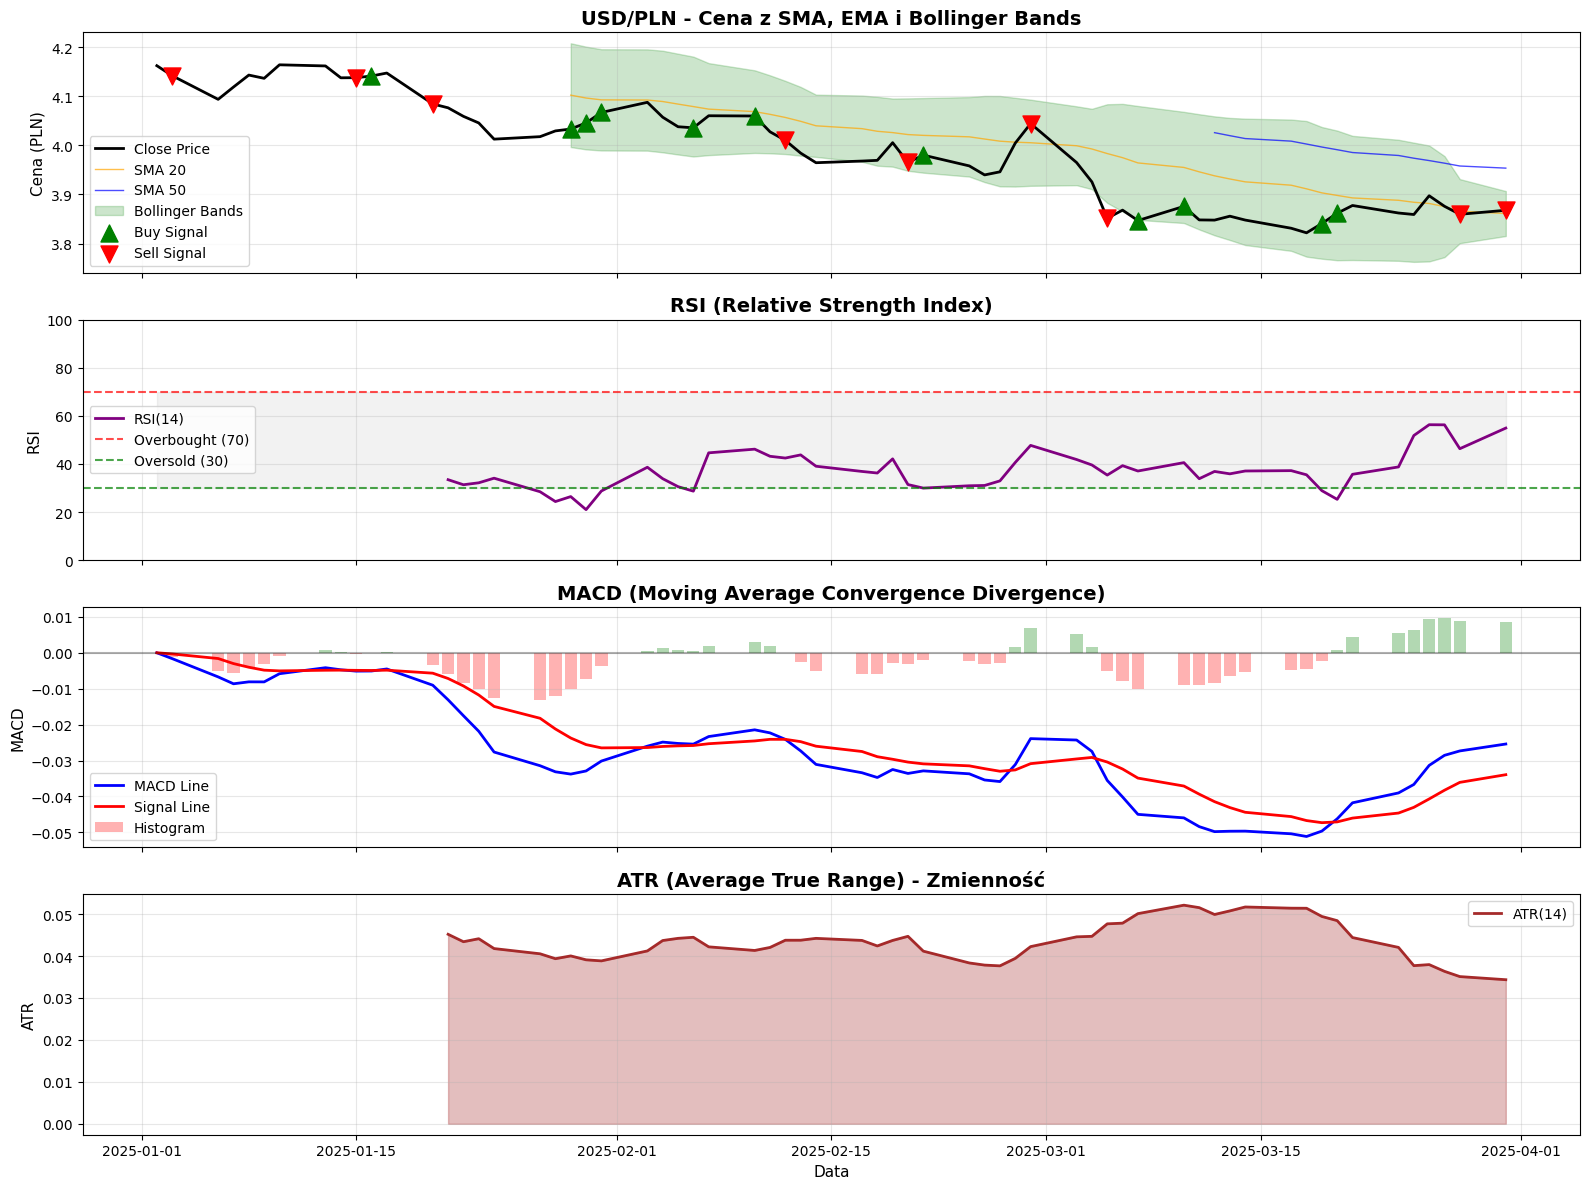

In [197]:
fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True)

# Wykres 1: Cena z SMA/EMA i Bollinger Bands
ax1 = axes[0]
ax1.plot(df.index, df['Close'], label='Close Price', color='black', linewidth=2, zorder=3)
ax1.plot(df.index, df['SMA_20'], label='SMA 20', alpha=0.7, color='orange', linewidth=1)
ax1.plot(df.index, df['SMA_50'], label='SMA 50', alpha=0.7, color='blue', linewidth=1)
ax1.fill_between(df.index, df['BB_Upper'], df['BB_Lower'], alpha=0.2, color='green', label='Bollinger Bands')

# Zaznaczmy sygnały
buy_signals_df = df[df['Signal'] == 1]
sell_signals_df = df[df['Signal'] == -1]
ax1.scatter(buy_signals_df.index, buy_signals_df['Close'], marker='^', color='green', s=150, label='Buy Signal', zorder=5)
ax1.scatter(sell_signals_df.index, sell_signals_df['Close'], marker='v', color='red', s=150, label='Sell Signal', zorder=5)

ax1.set_title('USD/PLN - Cena z SMA, EMA i Bollinger Bands', fontsize=14, fontweight='bold')
ax1.set_ylabel('Cena (PLN)', fontsize=11)
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

# Wykres 2: RSI
ax2 = axes[1]
ax2.plot(df.index, df['RSI'], label='RSI(14)', color='purple', linewidth=2)
ax2.axhline(70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
ax2.fill_between(df.index, 30, 70, alpha=0.1, color='gray')
ax2.set_ylim(0, 100)
ax2.set_title('RSI (Relative Strength Index)', fontsize=14, fontweight='bold')
ax2.set_ylabel('RSI', fontsize=11)
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)

# Wykres 3: MACD
ax3 = axes[2]
ax3.plot(df.index, df['MACD_Line'], label='MACD Line', color='blue', linewidth=2)
ax3.plot(df.index, df['MACD_Signal'], label='Signal Line', color='red', linewidth=2)
colors = ['green' if x > 0 else 'red' for x in df['MACD_Histogram']]
ax3.bar(df.index, df['MACD_Histogram'], label='Histogram', alpha=0.3, color=colors)
ax3.axhline(0, color='black', linestyle='-', alpha=0.3)
ax3.set_title('MACD (Moving Average Convergence Divergence)', fontsize=14, fontweight='bold')
ax3.set_ylabel('MACD', fontsize=11)
ax3.legend(loc='best', fontsize=10)
ax3.grid(True, alpha=0.3)

# Wykres 4: ATR
ax4 = axes[3]
ax4.plot(df.index, df['ATR'], label='ATR(14)', color='brown', linewidth=2)
ax4.fill_between(df.index, 0, df['ATR'], alpha=0.3, color='brown')
ax4.set_title('ATR (Average True Range) - Zmienność', fontsize=14, fontweight='bold')
ax4.set_ylabel('ATR', fontsize=11)
ax4.set_xlabel('Data', fontsize=11)
ax4.legend(loc='best', fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Analiza_Techniczna_USD_PLN.png', dpi=300, bbox_inches='tight')
print(' Wizualizacja zapisana: Analiza_Techniczna_USD_PLN.png')
plt.show()


## PODSUMOWANIE


In [198]:
print('PODSUMOWANIE ANALIZY TECHNICZNEJ USD/PLN')

print(f'\nOkres analizy: {df.index[0].date()} do {df.index[-1].date()}')
print(f'Liczba dni: {len(df)}')

print(f'\nWyniki:')
zmiana = ((df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0]) * 100
trend = 'WZROSTOWY' if zmiana > 0 else 'SPADKOWY'
print(f'  - Trend całkowity: {trend} ({zmiana:+.2f}%)')
print(f'  - Rekomendacja: {recommendation} ({confidence:.0f}% pewności)')
print(f'  - Sygnały kupna: {buy_count}')
print(f'  - Sygnały sprzedaży: {sell_count}')
print(f'  - Formacje: {total_patterns}')

print(f'\nWskaźniki (ostatni dzień):')
print(f'  - RSI: {last_rsi:.2f}')
print(f'  - MACD: {'Bullish' if last_macd_diff > 0 else 'Bearish'}')
print(f'  - ATR: {df["ATR"].iloc[-1]:.4f}')
print(f'  - Zmienność roczna: {annual_volatility:.2f}%')

PODSUMOWANIE ANALIZY TECHNICZNEJ USD/PLN

Okres analizy: 2025-01-02 do 2025-03-31
Liczba dni: 63

Wyniki:
  - Trend całkowity: SPADKOWY (-7.07%)
  - Rekomendacja: SPRZEDAWAJ (40% pewności)
  - Sygnały kupna: 11
  - Sygnały sprzedaży: 9
  - Formacje: 7

Wskaźniki (ostatni dzień):
  - RSI: 54.91
  - MACD: Bullish
  - ATR: 0.0343
  - Zmienność roczna: 10.62%
